### 1. Importing the Libraries
<ul>

<li>PANDAS to work with dataset</li>
<li>SEABORN to understand the data</li>
<li>MATPLOTLIB to visualise the data</li>

</ul>

In [150]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### 2. Loading the Dataset

In [33]:
df = pd.read_csv('D:/data cleaning/datasets/Sugarcane/List of Countries by Sugarcane Production.csv')
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


### 3. Data Cleaning
#### Realised some requirement for changes in the dataset

<ol>

<li>Presence of useless spaces in the names of the columns</li>
<li>Presence of '.' and ',' both in many integer values</li>


</ol>

In [34]:

df['Production (Tons)'] = df['Production (Tons)'].str.replace(".","")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace(".","")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(".","")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(",",".")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(",",".")


df.rename(columns= {'Production (Tons)':'Production(Tons)'}, inplace=True)
df.rename(columns= {'Acreage (Hectare)':'Acreage(Hectare)'},inplace=True)
df.rename(columns= {'Production per Person (Kg)':'Production per Person(Kg)'},inplace=True)
df.rename(columns= {'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)
df


,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,28386.4
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


#### Finding and droping the NULL values

In [36]:
df = df.dropna().reset_index()
df

,index,Unnamed: 0,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8


#### Deleting Unnecessary Columns

In [37]:
del df['index']
del df['Unnamed: 0']

#### Checking for the Datatypes of the Columns

In [39]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production per Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

#### Fixing the datatypes of the Columns

In [40]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production per Person(Kg)'] = df['Production per Person(Kg)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)


### 4.Data Analysis

#### How many countries produce sugarcane from each of the continent?

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64


<Axes: xlabel='Continent'>

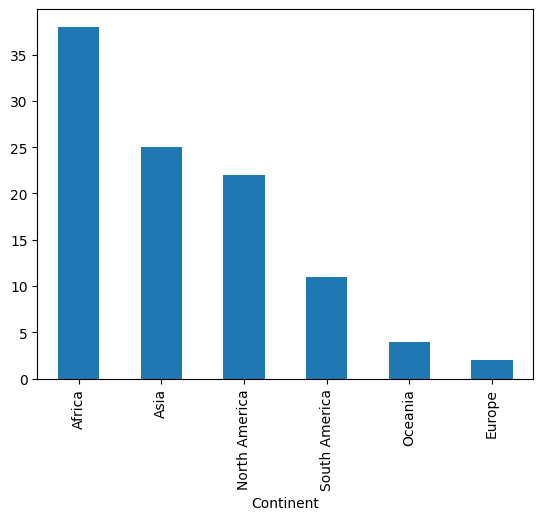

In [42]:
print(df['Continent'].value_counts())
df['Continent'].value_counts().plot(kind = 'bar')

### 5. Generalised graphs

#### Graph of Yield per hectare of every country as compared to other countries from the same continent

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\1243381507.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(),rotation = 90)


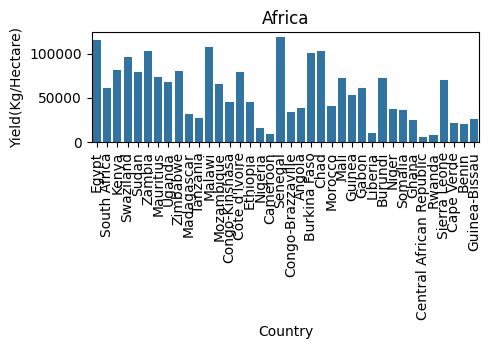

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\1243381507.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a2.set_xticklabels(a2.get_xticklabels(),rotation = 90)


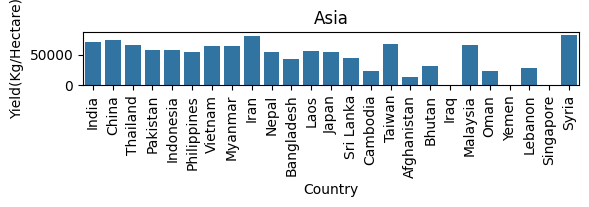

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\1243381507.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a3.set_xticklabels(a3.get_xticklabels(),rotation = 90)


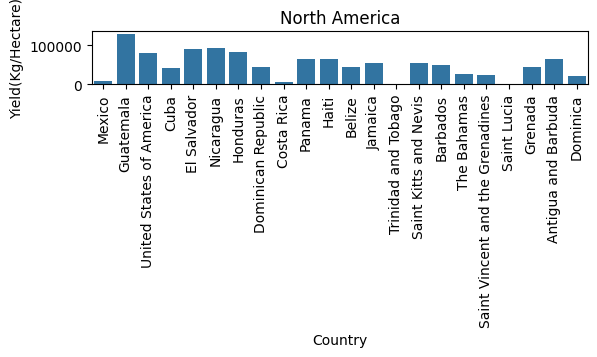

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\1243381507.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a4.set_xticklabels(a4.get_xticklabels(),rotation = 90)


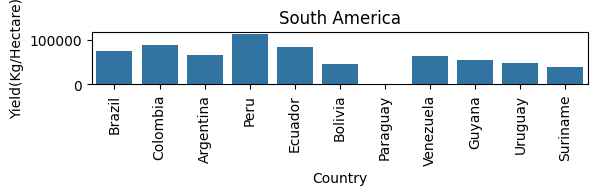

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\1243381507.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a5.set_xticklabels(a5.get_xticklabels(),rotation = 90)


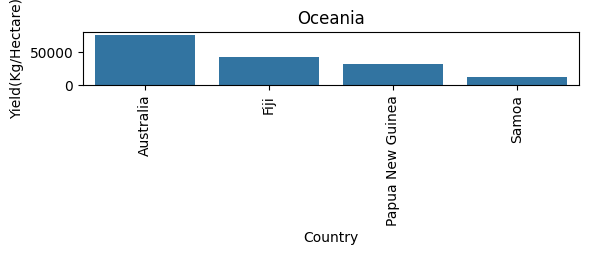

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\1243381507.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a6.set_xticklabels(a6.get_xticklabels(),rotation = 90)


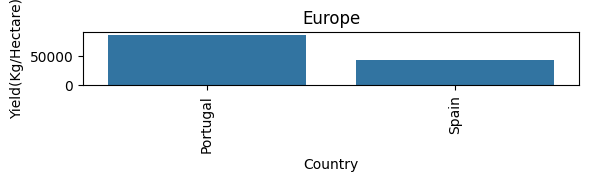

In [162]:
df.groupby(by = 'Continent')
plt.figure(figsize=(5,10))
plt.subplot(6,1,1)
a1 = sns.barplot(y = df[df['Continent'] == 'Africa']['Yield(Kg/Hectare)'],x = df[df['Continent'] == 'Africa']['Country'])
a1.set_xticklabels(a1.get_xticklabels(),rotation = 90)
plt.title("Africa")
plt.show()
plt.subplot(6,1,2)
a2 = sns.barplot(y = df[df['Continent'] == 'Asia']['Yield(Kg/Hectare)'],x = df[df['Continent'] == 'Asia']['Country']  )
a2.set_xticklabels(a2.get_xticklabels(),rotation = 90)
plt.title("Asia")
plt.show()
plt.subplot(6,1,3)
a3 = sns.barplot(y = df[df['Continent'] == 'North America']['Yield(Kg/Hectare)'],x = df[df['Continent'] == 'North America']['Country']  )
a3.set_xticklabels(a3.get_xticklabels(),rotation = 90)
plt.title("North America")
plt.show()
plt.subplot(6,1,4)
a4 = sns.barplot(y = df[df['Continent'] == 'South America']['Yield(Kg/Hectare)'],x = df[df['Continent'] == 'South America']['Country']  )
a4.set_xticklabels(a4.get_xticklabels(),rotation = 90)
plt.title("South America")
plt.show()
plt.subplot(6,1,5)
a5 = sns.barplot(y = df[df['Continent'] == 'Oceania']['Yield(Kg/Hectare)'],x = df[df['Continent'] == 'Oceania']['Country']  )
a5.set_xticklabels(a5.get_xticklabels(),rotation = 90)
plt.title("Oceania")
plt.show()
plt.subplot(6,1,6)
a6 = sns.barplot( y = df[df['Continent'] == 'Europe']['Yield(Kg/Hectare)'], x = df[df['Continent'] == 'Europe']['Country']  )
a6.set_xticklabels(a6.get_xticklabels(),rotation = 90)
plt.title("Europe")
plt.show()

#### Graph of Yield vs Country

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Country'>

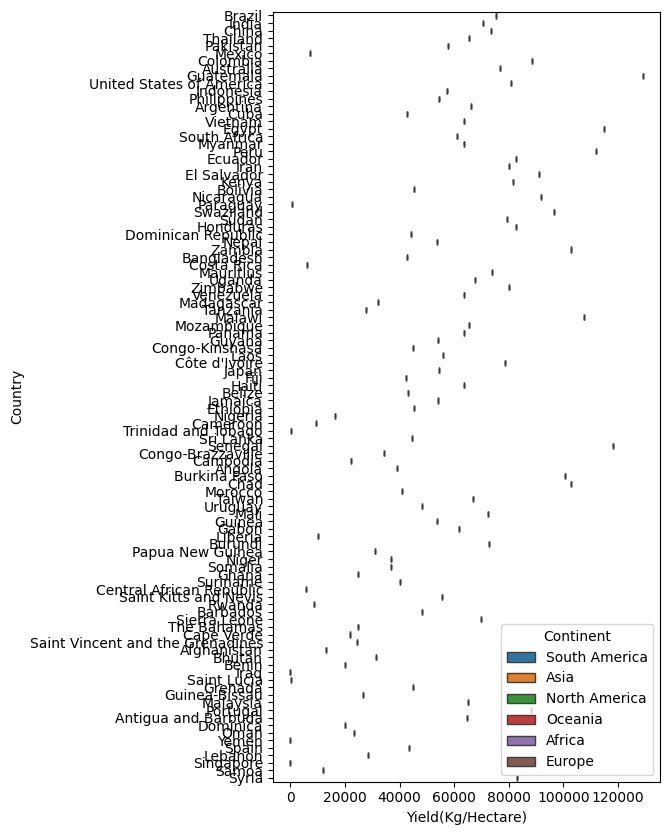

In [44]:

plt.figure(figsize = (5,10))
sns.boxplot(
    data= df,
    x=df['Yield(Kg/Hectare)'] , y=df['Country'],hue= df['Continent'], orient = 'y',
#   markers=True, dashes=False
)

### 6. Checking the outliers

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\313166659.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\313166659.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production per Person(Kg)'])
C:\Users\bhave\

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

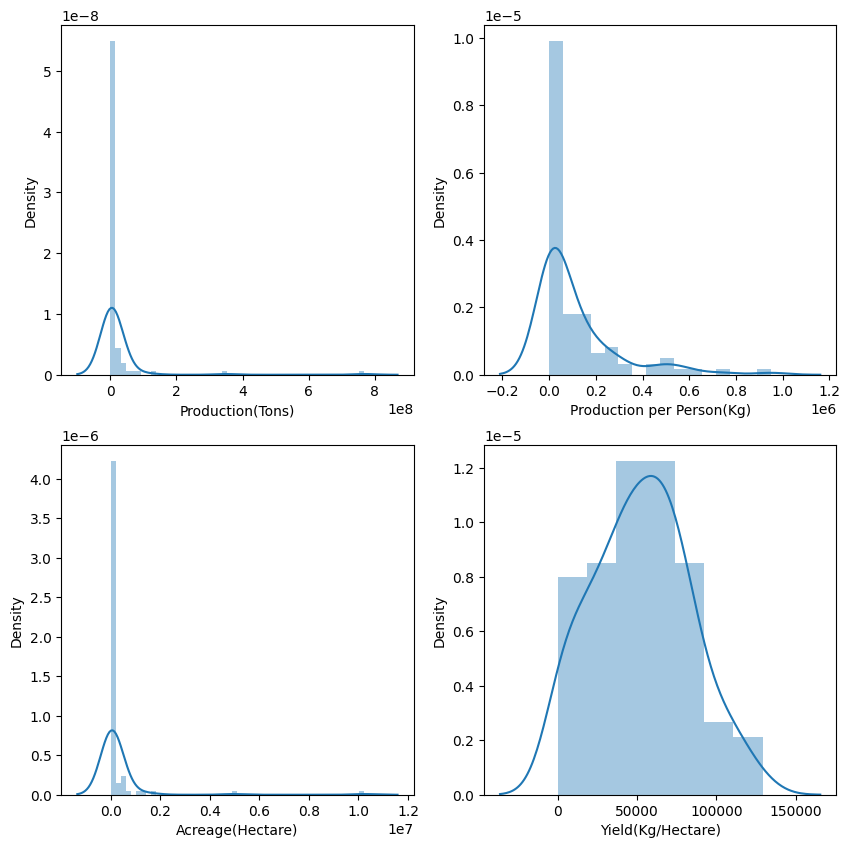

In [45]:
# column wise distribution plot
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production per Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

As we can see that every column except for YIELD is skewing towards the right. From that we can say that the data in YIELD is the only data which is evenly spreadout.

NOTE- In analysis process we can not remove the outliers because then the countries produiong the max amount of cane will also get removed. But we can see how many outliers we will have.

Also note that YIELD will be the only column which will not be able to give the outliers because of its even spreading which we can check using a boxplot.

<Axes: ylabel='Yield(Kg/Hectare)'>

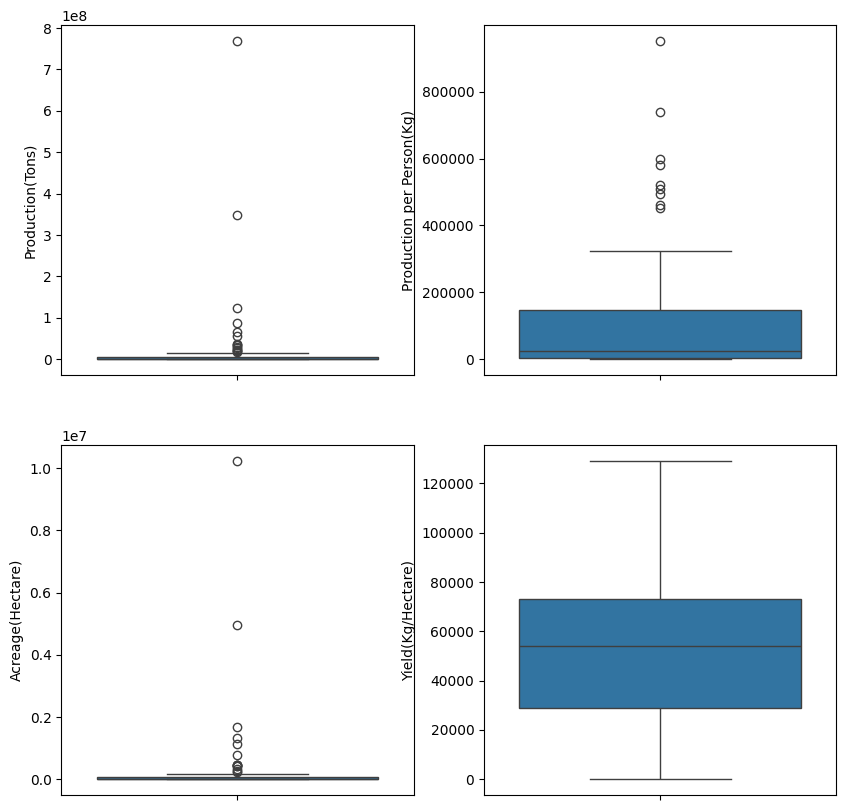

In [46]:
# boxplot for every column
# column wise distribution plot
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production per Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

We can see from the df.describe that the difference in the values of 75% and max is very far in every colun except for the Yield(Kg/Hectare) column that is the reason why we are getting the outliers.
<br>
<br>
Also see from the boxplot above that we get an outlier in every column but not in Yield column because of the same reason.

In [47]:
df.describe()

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### 7. Bivariate Data

#### Production percent<br>
We are making a new dataset to plot the Country vs its contribution in producing the sugarcane in the world graph.

<Axes: title={'center': 'Production Percent per Country'}, xlabel='Country'>

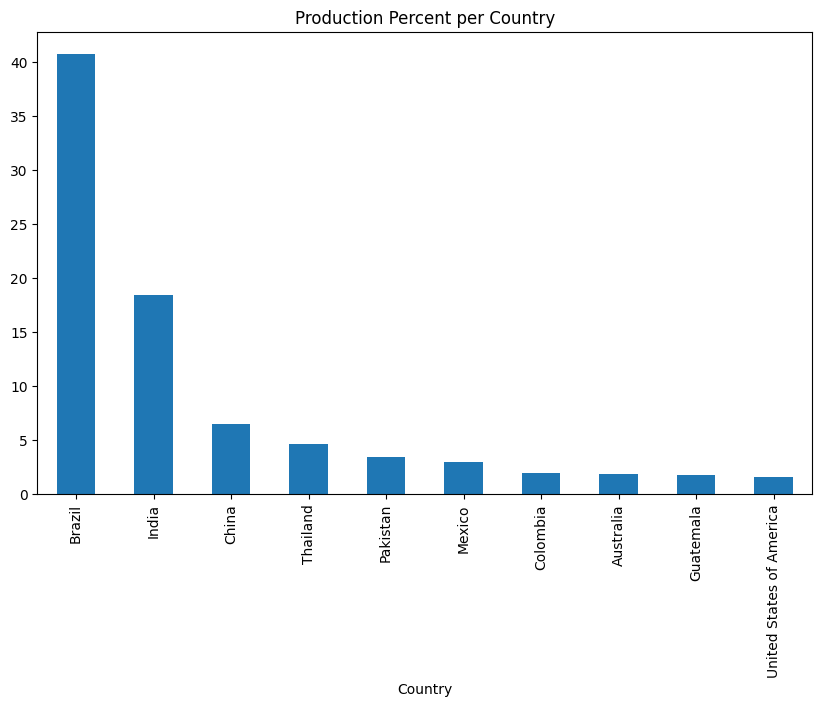

In [48]:
df_new = df[['Country','Production(Tons)']].set_index("Country")
df_new['production percent'] = (df_new['Production(Tons)'] / df_new['Production(Tons)'].sum())*100
df_new['production percent'].head(10).plot(kind = 'bar' , figsize=(10,6),   title = 'Production Percent per Country')

#### Making the same graph using sns.
<br>
<br>
Also note that to get the names of the countries using pandas you can use the new df which we made as df_new because it will always show the index on the x axis.


C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\1001679568.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


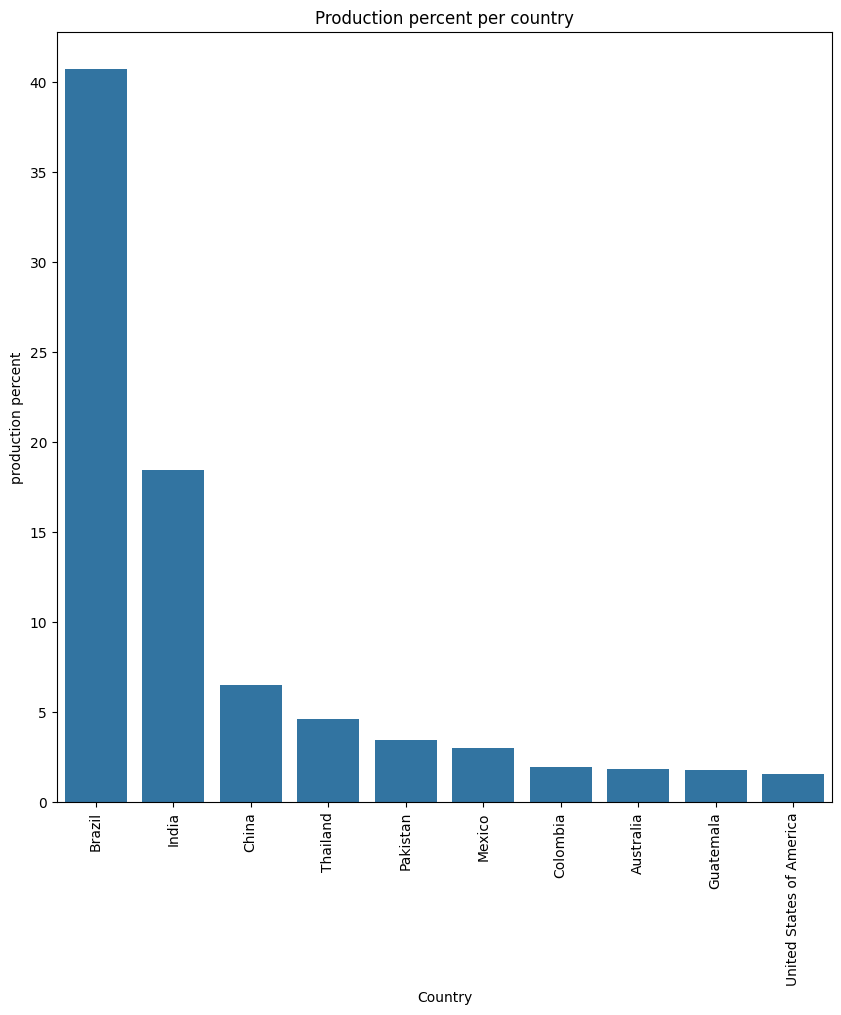

In [163]:
df['production percent'] = df_new['production percent']
plt.figure(figsize=(10,10))
ax = sns.barplot(data = df_new.head(10), y = 'production percent',x = 'Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Production percent per country")
plt.show()

<Axes: ylabel='production percent'>

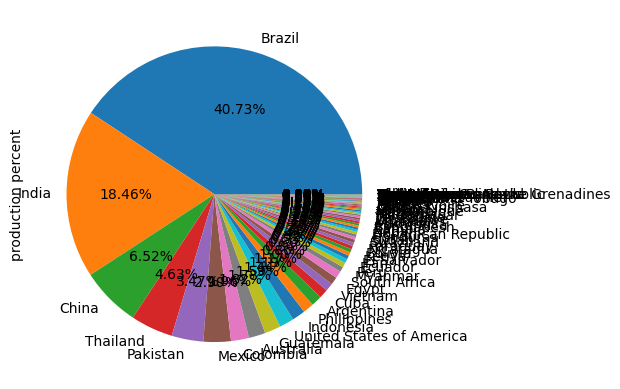

In [128]:
df_new['production percent'].plot(kind = 'pie',autopct = '%0.2f%%')

#### Which Country has the max land?

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\3885123856.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


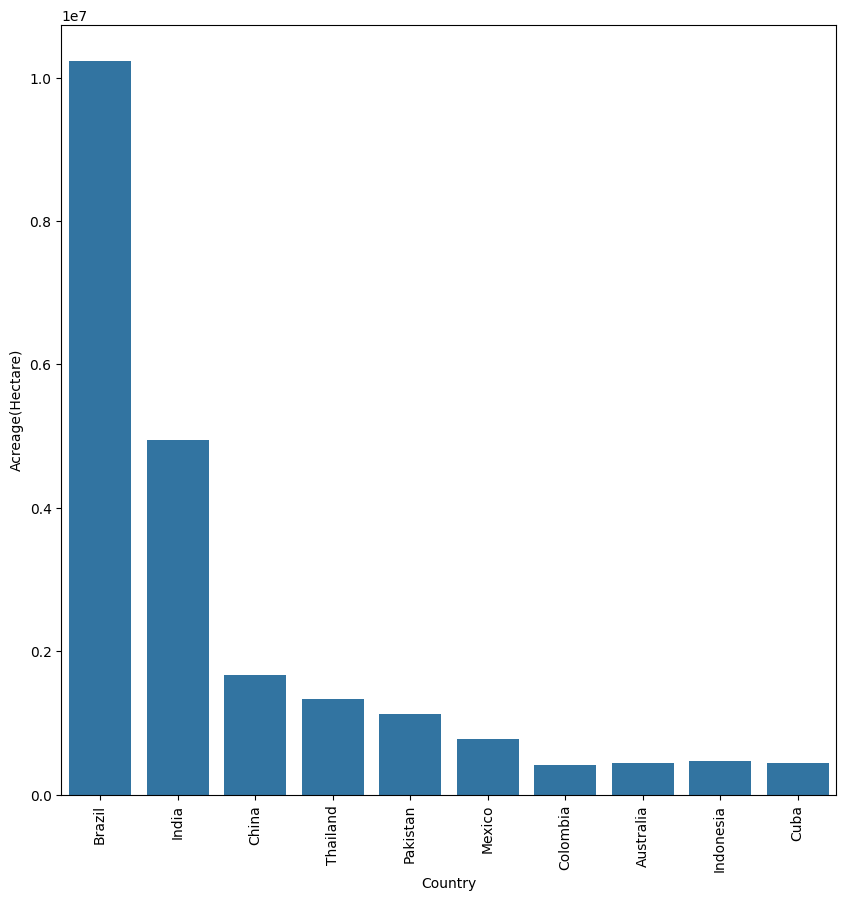

In [129]:
plt.figure(figsize=(10,10))
df_acr = df.sort_values("Acreage(Hectare)", ascending=False)

ax = sns.barplot(y = df_acr['Acreage(Hectare)'],x = df_acr['Country'].head(10))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### Which Country has the max yield per hectare?

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\224126842.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


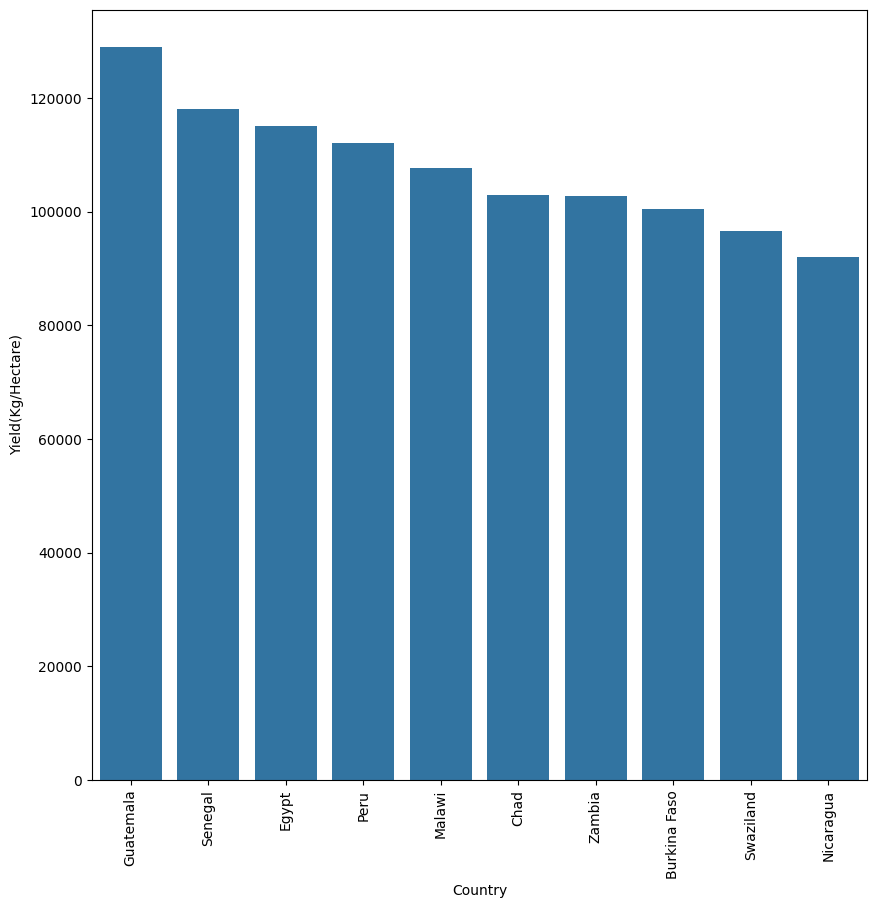

In [130]:
plt.figure(figsize=(10,10))
df_yph = df.sort_values("Yield(Kg/Hectare)", ascending=False)

ax = sns.barplot(data = df_yph.head(10),y = 'Yield(Kg/Hectare)',x = 'Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### Which country has the highest production?

C:\Users\bhave\AppData\Local\Temp\ipykernel_40904\367413657.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


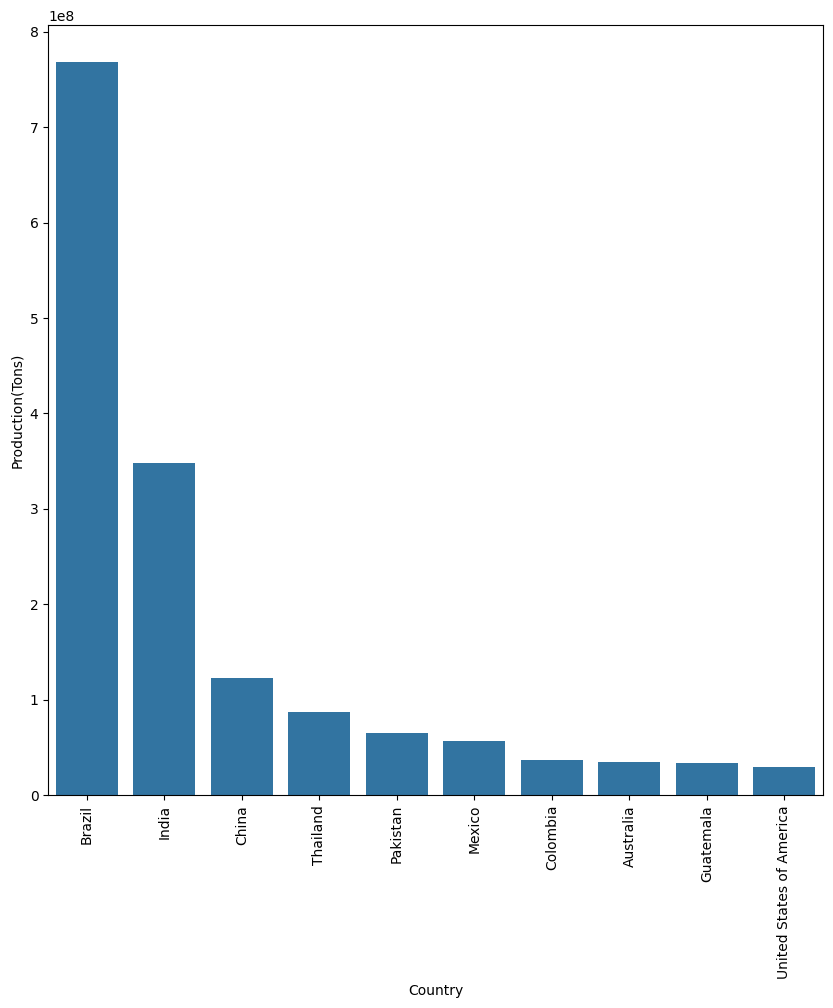

In [131]:
plt.figure(figsize=(10,10))
df_p = df.sort_values("Production(Tons)", ascending=False)

ax = sns.barplot(data = df_p.head(10),y = 'Production(Tons)',x = 'Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### 8. Correlation

We have made a new dataset without the 2 columns with country names and continent names so that we are able to find the correlation among the columns.

In [132]:
df_1 = df.drop(['Country','Continent'], axis =1)
df_1.corr()

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production per Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


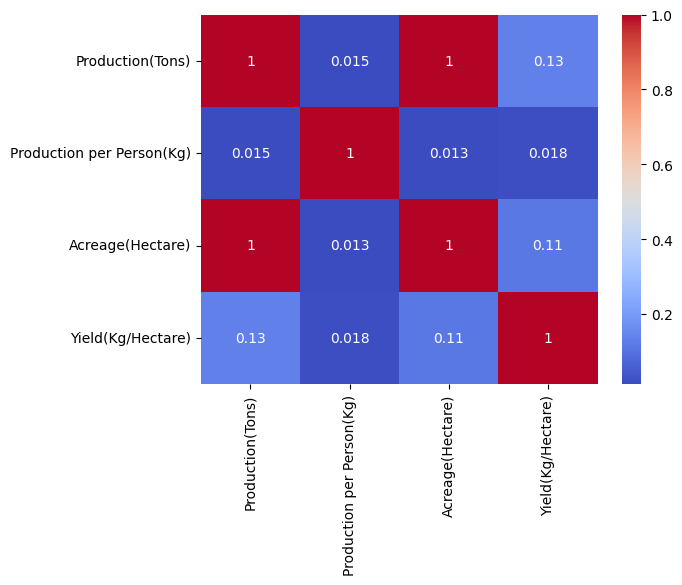

In [133]:
sns.heatmap(df_1.corr(),annot=True,cmap = 'coolwarm')
plt.show()

#### Do countries with more area produce more sugarcane?<br>
-YES<br>

<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

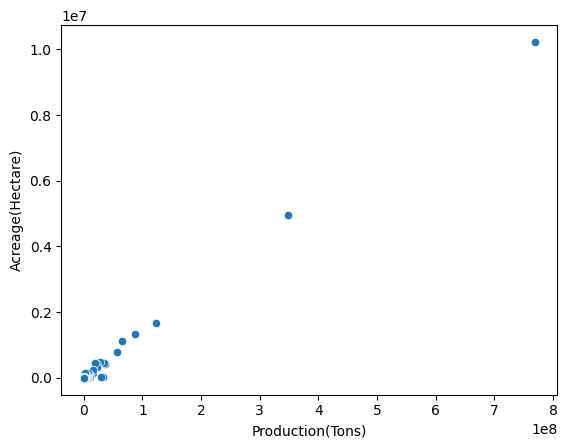

In [148]:
# you can also use scatterplot for the same

sns.scatterplot(data = df, x = 'Production(Tons)', y = 'Acreage(Hectare)')

#### Do countries which yield more sugarcane per hectare produces more sugarcane in total?<br>
-NO<br>

<Axes: xlabel='Production(Tons)', ylabel='Yield(Kg/Hectare)'>

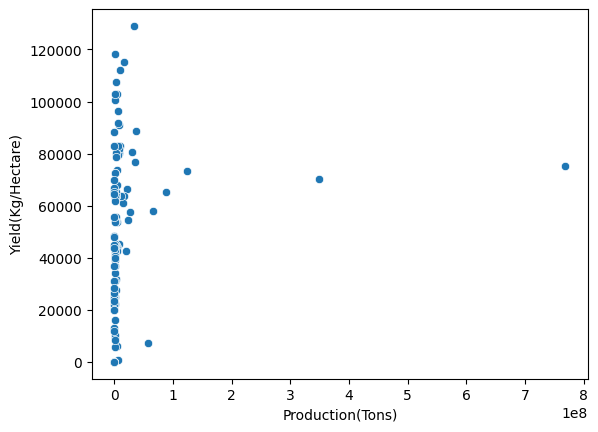

In [135]:
sns.scatterplot(data = df, x = 'Production(Tons)', y = 'Yield(Kg/Hectare)')

### 9. Analysis by Continent

#### Segregating the data in a new dataframe on the basis of Continent

In [164]:
df_continent = df.groupby('Continent').sum()
df_continent = df_continent.drop(['Country'], axis = 1)
df_continent

#### Which continent produces maximum sugarcane?


In [139]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

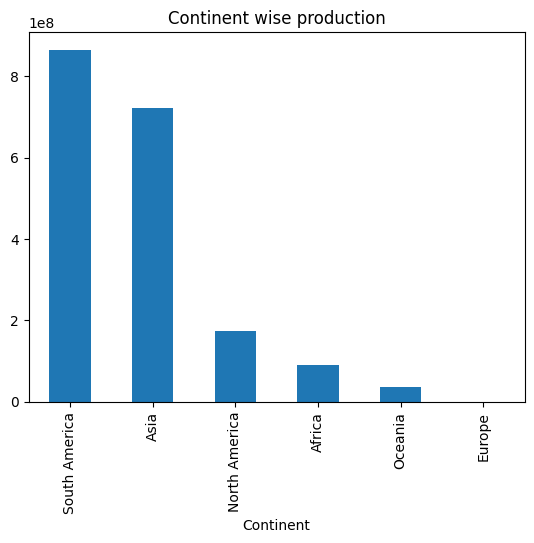

In [166]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind = 'bar')
plt.title("Continent wise production")
plt.show()

#### Which continent has the max Acreage?


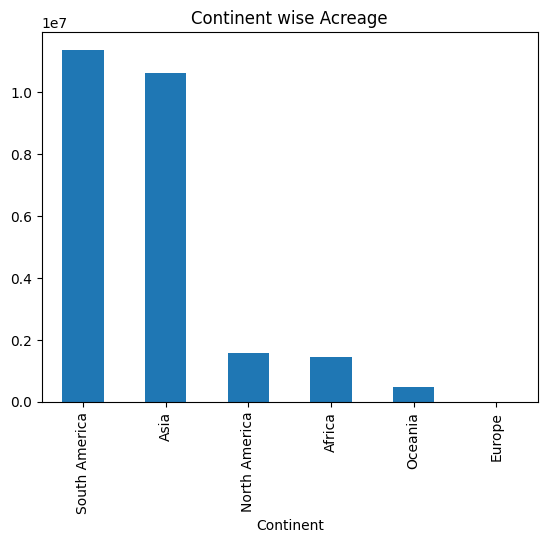

In [167]:
df_continent['Acreage(Hectare)'].sort_values(ascending=False).plot(kind = 'bar')
plt.title("Continent wise Acreage")
plt.show()

#### Do number of countries producing sugarcane in a continent affect the production?<br>
-NO

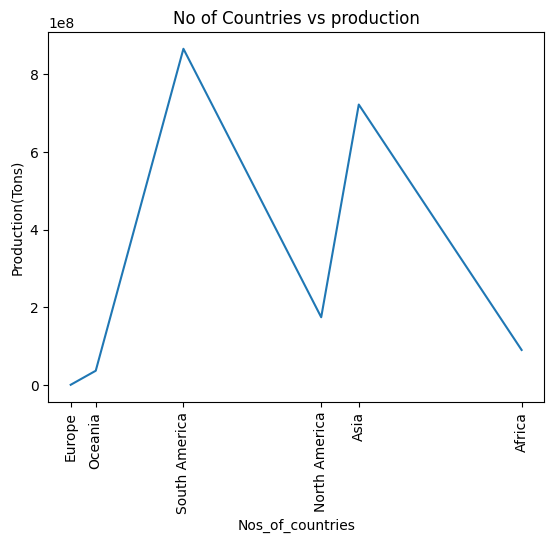

In [169]:
df_continent['Nos_of_countries'] = df.groupby("Continent").count()["Country"]

continent_names = df_continent.index.tolist()
sns.lineplot(data = df_continent, y = 'Production(Tons)', x = 'Nos_of_countries')
plt.xticks(df_continent['Nos_of_countries'], continent_names,rotation = 90)
plt.title("No of Countries vs production")
plt.show()

Do continent with highest land produces more sugarcane?<br>-YES

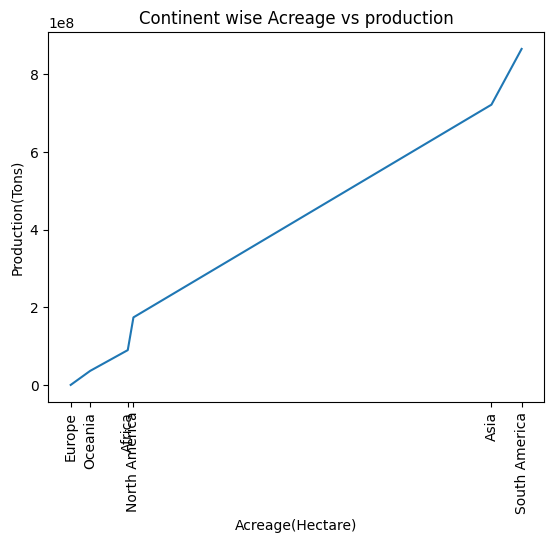

In [174]:
df_continent['Acreage_continent'] = df.groupby("Continent")["Acreage(Hectare)"].sum()

continent_names = df_continent.index.tolist()
sns.lineplot(data = df_continent, y = 'Production(Tons)', x = 'Acreage(Hectare)')
plt.xticks(df_continent['Acreage_continent'], continent_names,rotation = 90)
plt.title("Continent wise Acreage vs production")
plt.show()

#### Production distribution by continent

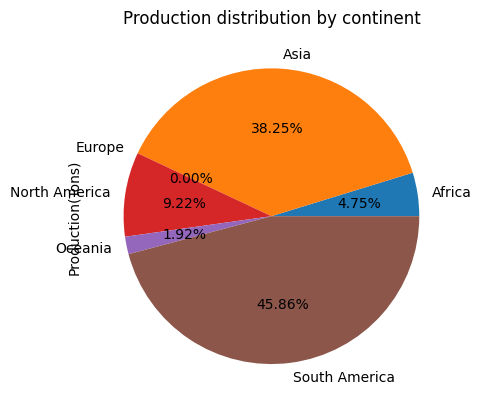

In [144]:
df_continent['Production(Tons)'].plot(kind = 'pie',autopct = '%0.2f%%')
plt.title("Production distribution by continent")
plt.show()

### 10. Correlation for continent

In [145]:
df_continent.corr()

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Nos_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production per Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Nos_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


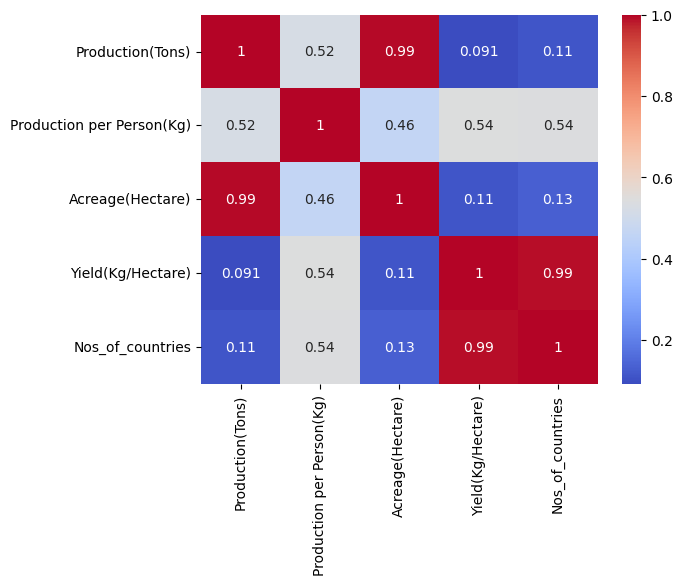

In [146]:
sns.heatmap(df_continent.corr(), annot=True,cmap = 'coolwarm' )
plt.show()